In [2]:
tree = ("ast(A,B), ast(C,A), ast(D,A), ast(E,A), ast(F,A), ast(G,"
    "A), ast(H,A), ast(I,B), ast(J,B), ast(K,B), ast(L,B), "
    "ast(M,B), ast(N,B), ast(O,B), ast(P,B), ast(Q,B), ast(R,"
    "B), ast(S,B), ast(T,B), ast(U,B), ast(V,B), ast(W,B), "
    "ast(X,B), ast(Y,B), ast(Z,N), ast(A0,N), ast(B0,N), "
    "ast(C0,N), ast(D0,M), ast(E0,M), ast(F0,M), ast(G0,M), "
    "ast(H0,M), ast(I0,M), ast(J0,Q), ast(K0,Q), ast(L0,Q), "
    "ast(M0,Q), ast(N0,L), ast(O0,L), ast(P0,L), ast(Q0,L), "
    "ast(R0,L), ast(S0,L), ast(T0,J), ast(U0,J), ast(V0,J), "
    "ast(W0,J), ast(X0,J), ast(Y0,J), ast(Z0,J), ast(A1,J), "
    "ast(B1,R), ast(C1,R), ast(D1,R), ast(E1,R), ast(F1,K), "
    "ast(G1,K), ast(H1,K), ast(I1,K), ast(J1,O), ast(K1,O), "
    "ast(L1,O), ast(M1,O), ast(N1,O), ast(O1,O), ast(P1,P), "
    "ast(Q1,P), ast(R1,P), ast(S1,P), ast(T1,I), ast(U1,I), "
    "ast(V1,I), ast(W1,I)")
tree

'ast(A,B), ast(C,A), ast(D,A), ast(E,A), ast(F,A), ast(G,A), ast(H,A), ast(I,B), ast(J,B), ast(K,B), ast(L,B), ast(M,B), ast(N,B), ast(O,B), ast(P,B), ast(Q,B), ast(R,B), ast(S,B), ast(T,B), ast(U,B), ast(V,B), ast(W,B), ast(X,B), ast(Y,B), ast(Z,N), ast(A0,N), ast(B0,N), ast(C0,N), ast(D0,M), ast(E0,M), ast(F0,M), ast(G0,M), ast(H0,M), ast(I0,M), ast(J0,Q), ast(K0,Q), ast(L0,Q), ast(M0,Q), ast(N0,L), ast(O0,L), ast(P0,L), ast(Q0,L), ast(R0,L), ast(S0,L), ast(T0,J), ast(U0,J), ast(V0,J), ast(W0,J), ast(X0,J), ast(Y0,J), ast(Z0,J), ast(A1,J), ast(B1,R), ast(C1,R), ast(D1,R), ast(E1,R), ast(F1,K), ast(G1,K), ast(H1,K), ast(I1,K), ast(J1,O), ast(K1,O), ast(L1,O), ast(M1,O), ast(N1,O), ast(O1,O), ast(P1,P), ast(Q1,P), ast(R1,P), ast(S1,P), ast(T1,I), ast(U1,I), ast(V1,I), ast(W1,I)'

In [54]:
edge_strings = tree.split(', ')

In [10]:
ast_edges = []
cfg_edges = []

for edge in edge_strings:
    edge_type = edge[0:3]
    
    start, end = edge[4:-1].split(',')
    
    if edge_type == 'ast':
        ast_edges.append(
            (start, end)
        )
    
    if edge_type == 'cfg':
        cfg_edges.append(
            (start, end)
        )

In [16]:
def make_dot_edge(edge):
    start, end = edge
    return start + " -> " + end

In [33]:
cfg_dot_edgelist = '\n'.join(map(make_dot_edge, cfg_edges))
ast_dot_edgelist = '\n'.join(map(make_dot_edge, ast_edges))

In [34]:
dot_template = """
digraph g {
   {  # AST
       edge[color=green3, constraint=true]
       """ + ast_dot_edgelist + """    
   }
   {  # CFG
       edge[color=red3, constraint=false]
       """ + cfg_dot_edgelist + """
   }
}
"""

In [40]:
!apt install -y graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig fonts-liberation libcairo2 libcdt5 libcgraph6 libdatrie1
  libfribidi0 libgd3 libgraphite2-3 libgts-0.7-5 libgts-bin libgvc6 libgvpr2
  libharfbuzz0b libjbig0 liblab-gamut1 libpango-1.0-0 libpangocairo-1.0-0
  libpangoft2-1.0-0 libpathplan4 libpixman-1-0 libthai-data libthai0 libtiff5
  libwebp6 libxaw7 libxcb-render0 libxcb-shm0 libxmu6
Suggested packages:
  gsfonts graphviz-doc libgd-tools
The following NEW packages will be installed:
  fontconfig fonts-liberation graphviz libcairo2 libcdt5 libcgraph6 libdatrie1
  libfribidi0 libgd3 libgraphite2-3 libgts-0.7-5 libgts-bin libgvc6 libgvpr2
  libharfbuzz0b libjbig0 liblab-gamut1 libpango-1.0-0 libpangocairo-1.0-0
  libpangoft2-1.0-0 libpathplan4 libpixman-1-0 libthai-data libthai0 libtiff5
  libwebp6 libxaw7 libxcb-render0 libxcb-shm0 libxmu6
0 upgraded, 30 newly installed, 0 t

Selecting previously unselected package libxcb-shm0:amd64.
Preparing to unpack .../12-libxcb-shm0_1.13.1-2_amd64.deb ...
7Progress: [ 21%] [###########...............................................] 8Unpacking libxcb-shm0:amd64 (1.13.1-2) ...
7Progress: [ 21%] [############..............................................] 8Selecting previously unselected package libcairo2:amd64.
Preparing to unpack .../13-libcairo2_1.16.0-4_amd64.deb ...
7Progress: [ 22%] [############..............................................] 8Unpacking libcairo2:amd64 (1.16.0-4) ...
7Progress: [ 23%] [#############.............................................] 8Selecting previously unselected package libthai-data.
Preparing to unpack .../14-libthai-data_0.1.28-2_all.deb ...
Unpacking libthai-data (0.1.28-2) ...
7Progress: [ 25%] [##############............................................] 8Selecting previously unselected package libdatrie1:amd64.
Preparing to unpack .../15-libdatrie1_0.2.12-2_amd64.deb 

7Progress: [ 70%] [########################################..................] 87Progress: [ 71%] [#########################################.................] 8Setting up libfribidi0:amd64 (1.0.5-3.1) ...
7Progress: [ 73%] [##########################################................] 8Setting up libwebp6:amd64 (0.6.1-2) ...
7Progress: [ 74%] [##########################################................] 87Progress: [ 74%] [###########################################...............] 8Setting up fonts-liberation (1:1.07.4-9) ...
7Progress: [ 75%] [###########################################...............] 87Progress: [ 76%] [############################################..............] 8Setting up libharfbuzz0b:amd64 (2.3.1-1) ...
7Progress: [ 78%] [#############################################.............] 8Setting up libthai-data (0.1.28-2) ...
7Progress: [ 79%] [#############################################.............] 87Progress: [ 79%] [############################

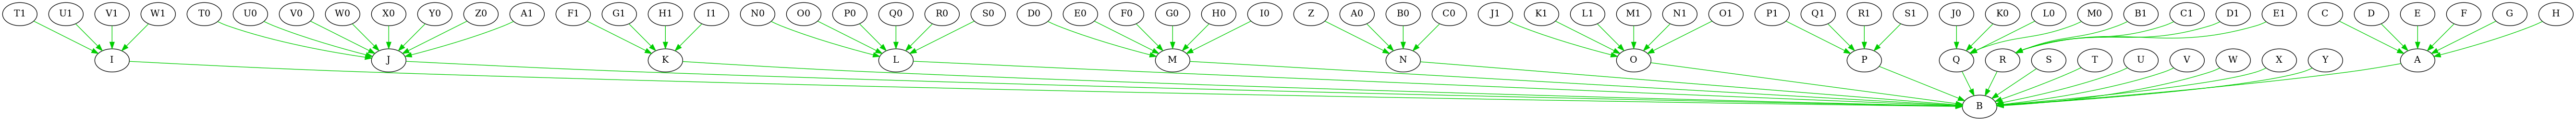

In [52]:
import subprocess

with open("../data/example_progol_rule.dot", 'w') as f:
    f.write(dot_template)

subprocess.check_call(["dot", "-O", "-Tpng","../data/example_progol_rule.dot"])
subprocess.check_call(["dot", "-O", "-Tsvg", "../data/example_progol_rule.dot"])

from IPython.display import Image
Image(filename="../data/example_progol_rule.dot.png")

In [53]:
!mv '../data/example_progol_rule.dot.png' '../images/example_progol_rule.dot.png'
!mv '../data/example_progol_rule.dot.svg' '../images/example_progol_rule.dot.svg'

In [73]:
new_tree = ("ast(A,B), ast(C,A), ast(D,A), cfg(E,A), ast(B,F), ast(E,"
    "G), ast(G,C), ast(H,C), ast(I,C), ast(J,C), ast(K,B), "
    "cfg(D,L), cfg(M,E), ast(L,H), ast(M,G), ast(N,H), ast(O,"
    "H), ast(P,H), ast(Q,I), ast(R,I), ast(S,F), ast(T,F), "
    "ast(U,F), ast(V,F), ast(W,F), ast(X,F), ast(Y,L), ast(Z,"
    "K), ast(A0,K), ast(B0,K), ast(C0,K), ast(D0,K), ast(E0,"
    "K), cfg(G,M), cfg(I,Q), cfg(L,Y), cfg(R,G), cfg(F0,I), "
    "cfg(G0,K).")
new_tree = new_tree.strip().strip('.')

In [74]:
new_edge_strings = new_tree.split(', ')

In [75]:
new_ast_edges = []
new_cfg_edges = []

for edge in new_edge_strings:
    edge_type = edge[0:3]
    
    start, end = edge[4:-1].split(',')
    
    if edge_type == 'ast':
        new_ast_edges.append(
            (start, end)
        )
    
    if edge_type == 'cfg':
        new_cfg_edges.append(
            (start, end)
        )

In [76]:
new_cfg_dot_edgelist = '\n'.join(map(make_dot_edge, new_cfg_edges))
new_ast_dot_edgelist = '\n'.join(map(make_dot_edge, new_ast_edges))

In [77]:
new_dot_template = """
digraph g {
   {  # AST
       edge[color=green3, constraint=true]
       """ + new_ast_dot_edgelist + """    
   }
   {  # CFG
       edge[color=red3, constraint=false]
       """ + new_cfg_dot_edgelist + """
   }
}
"""

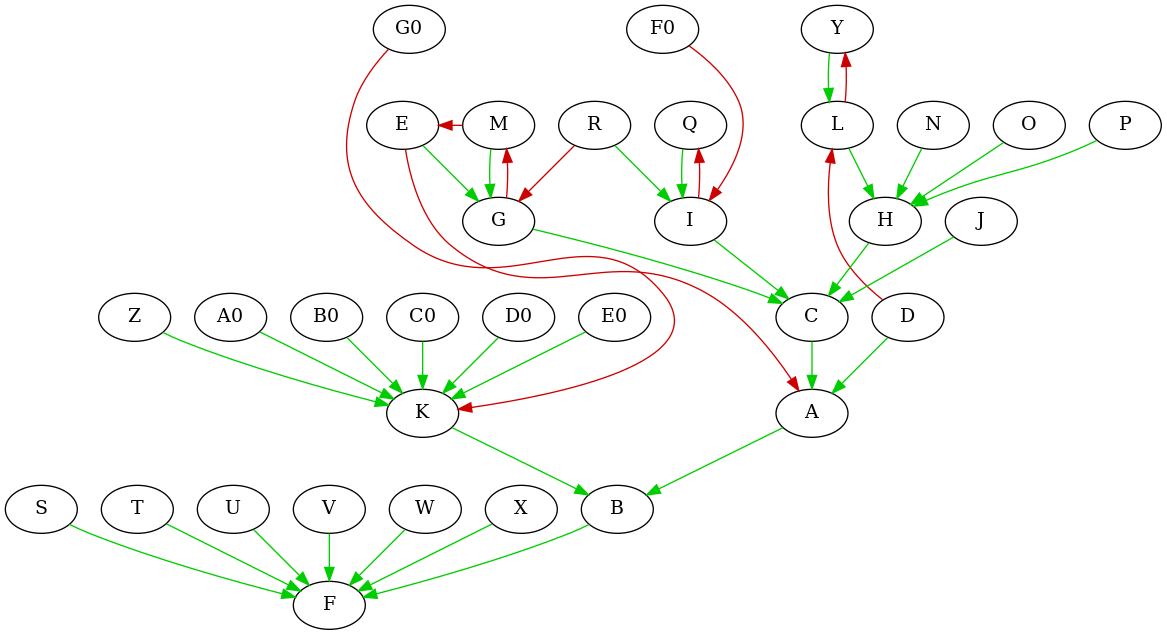

In [78]:
dot_filename = "../data/example2_progol_rule.dot"

with open(dot_filename, 'w') as f:
    f.write(new_dot_template)

subprocess.check_call(["dot", "-O", "-Tpng", dot_filename])
subprocess.check_call(["dot", "-O", "-Tsvg", dot_filename])

from IPython.display import Image
Image(filename=dot_filename+".png")